In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sugar_consumption_dataset.csv')
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values (fill with median for numerical columns)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Convert Year to datetime if needed
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
print("\nNumber of duplicates:", df.duplicated().sum())

Missing values per column:
Country                           0
Year                              0
Country_Code                      0
Continent                         0
Region                            0
Population                        0
GDP_Per_Capita                    0
Per_Capita_Sugar_Consumption      0
Total_Sugar_Consumption           0
Sugar_From_Sugarcane              0
Sugar_From_Beet                   0
Sugar_From_HFCS                   0
Sugar_From_Other                  0
Processed_Food_Consumption        0
Avg_Daily_Sugar_Intake            0
Diabetes_Prevalence               0
Obesity_Rate                      0
Sugar_Imports                     0
Sugar_Exports                     0
Avg_Retail_Price_Per_Kg           0
Gov_Tax                         531
Gov_Subsidies                     0
Education_Campaign              520
Urbanization_Rate                 0
Climate_Conditions                0
Sugarcane_Production_Yield        0
dtype: int64

Number of duplicates: 0

/var/folders/1_/gbkwq2lj4nz0t_wj6_6s21vh0000gn/T/ipykernel_60340/3817909954.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Exploratory Data Analysis

    Sugar Consumption Trends Over Time

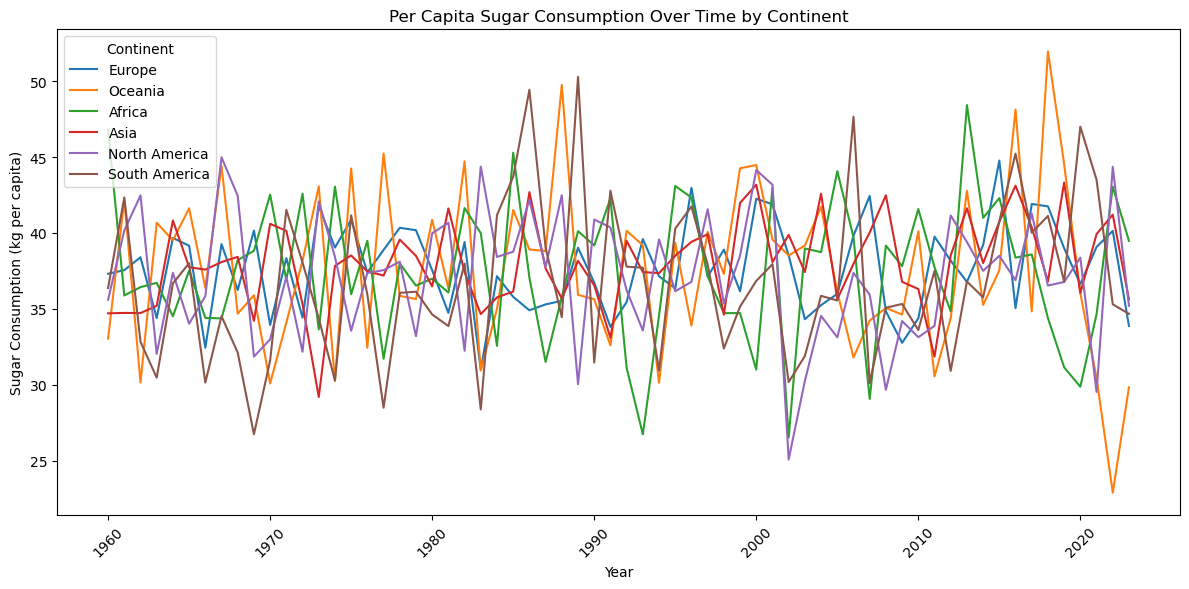

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Per_Capita_Sugar_Consumption', hue='Continent', data=df, errorbar=None)
plt.title('Per Capita Sugar Consumption Over Time by Continent')
plt.ylabel('Sugar Consumption (kg per capita)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Top Sugar Consuming Countries

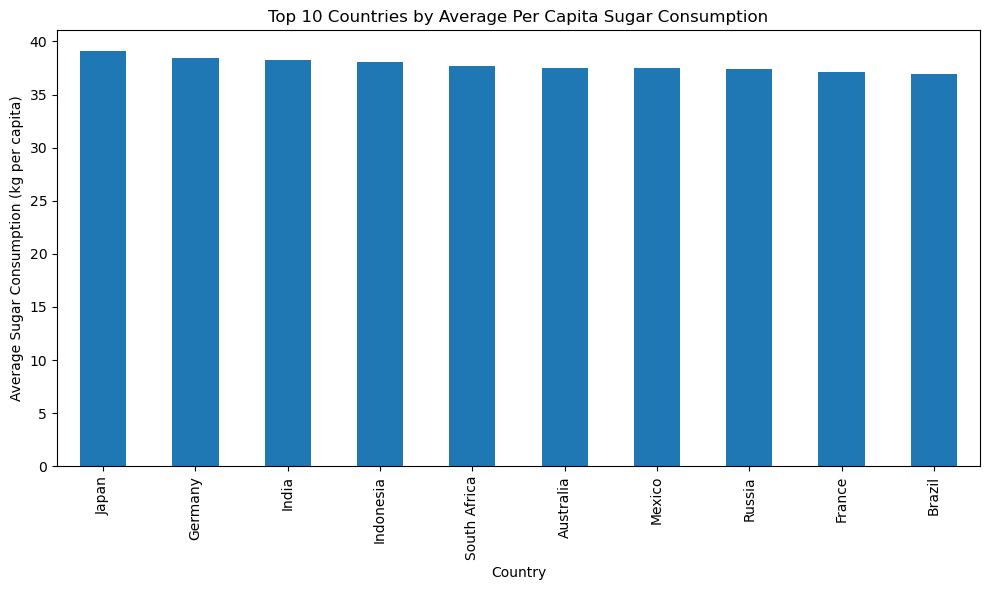

In [6]:
top_countries = df.groupby('Country')['Per_Capita_Sugar_Consumption'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Average Per Capita Sugar Consumption')
plt.ylabel('Average Sugar Consumption (kg per capita)')
plt.tight_layout()
plt.show()

 Relationship Between Sugar Consumption and Health Indicators

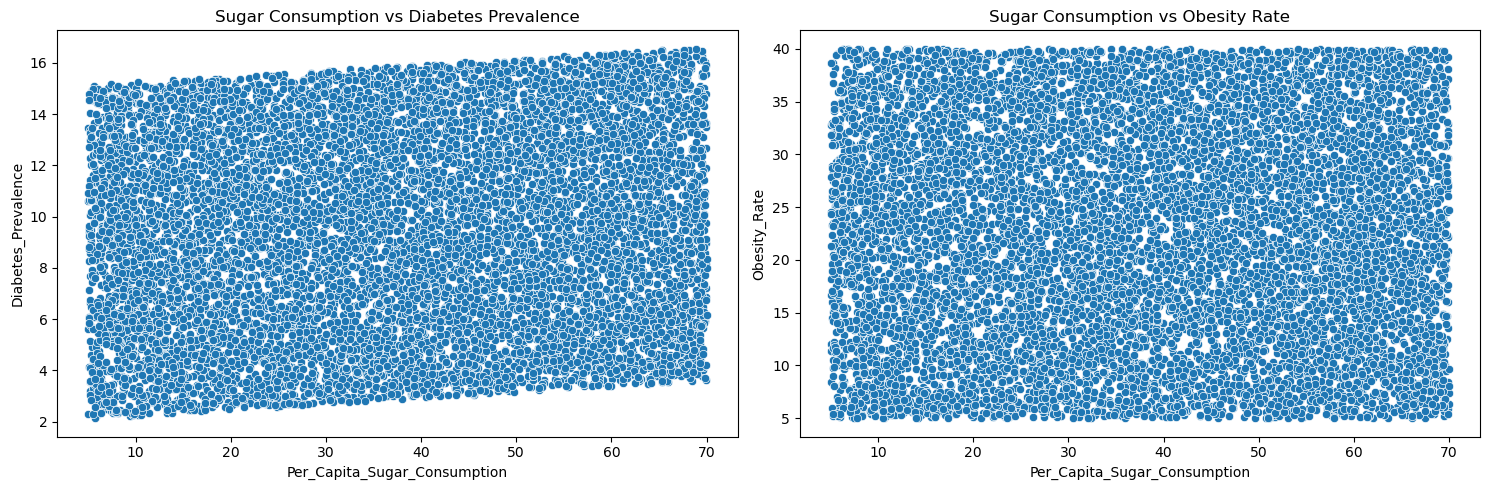

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x='Per_Capita_Sugar_Consumption', y='Diabetes_Prevalence', data=df, ax=axes[0])
axes[0].set_title('Sugar Consumption vs Diabetes Prevalence')

sns.scatterplot(x='Per_Capita_Sugar_Consumption', y='Obesity_Rate', data=df, ax=axes[1])
axes[1].set_title('Sugar Consumption vs Obesity Rate')

plt.tight_layout()
plt.show()

Sugar Consumption by GDP Per Capita


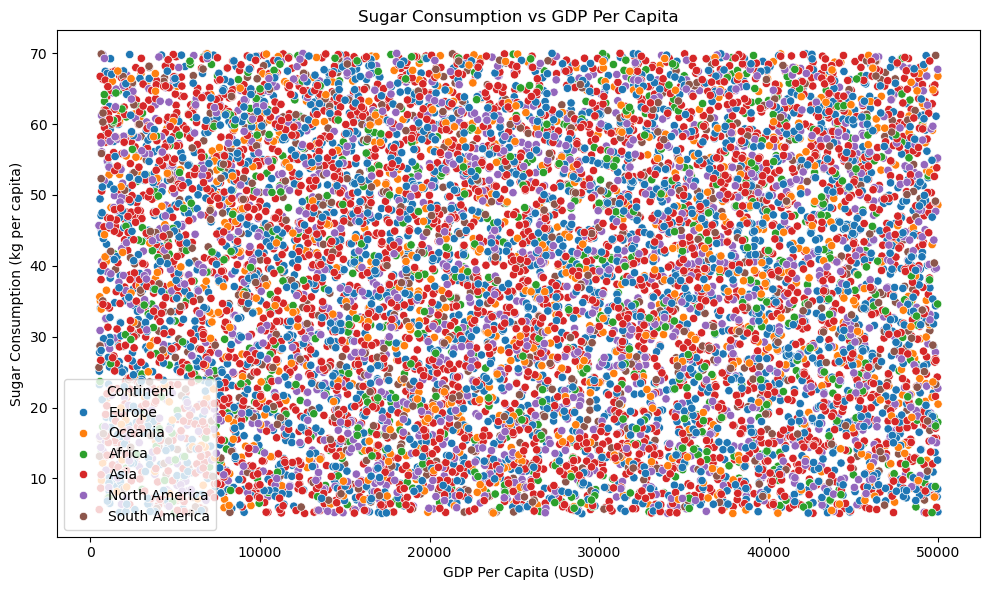

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP_Per_Capita', y='Per_Capita_Sugar_Consumption', hue='Continent', data=df)
plt.title('Sugar Consumption vs GDP Per Capita')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Sugar Consumption (kg per capita)')
plt.tight_layout()
plt.show()

Government Policies Impact

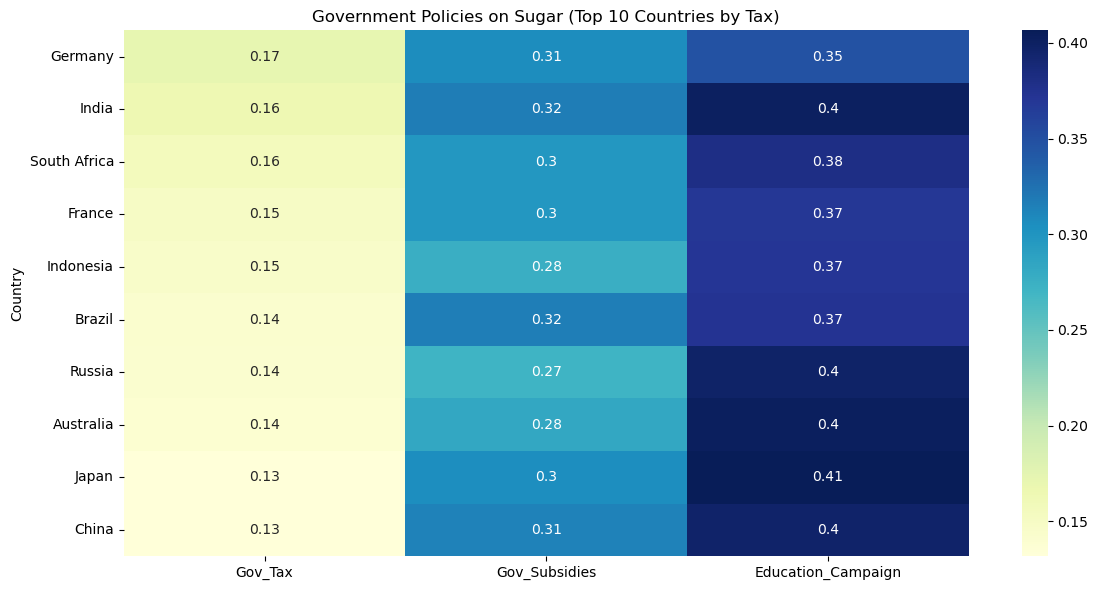

In [12]:
policy_cols = ['Gov_Tax', 'Gov_Subsidies', 'Education_Campaign']
policy_impact = df.groupby('Country')[policy_cols].mean().sort_values('Gov_Tax', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.heatmap(policy_impact, annot=True, cmap='YlGnBu')
plt.title('Government Policies on Sugar (Top 10 Countries by Tax)')
plt.tight_layout()
plt.show()